In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
distancia_objeto = np.array([65, 66, 67, 68, 69, 70, 71, 72, 74, 85])
distancia_imagen = np.array([65.0, 62.0, 63.0, 60.0, 60.5, 61.0, 61.0, 60.0, 59.0, 56.0])

In [83]:
d_o_ = np.flip(1/distancia_objeto)
d_i_ = np.flip(1/distancia_imagen)

d_o_error = .5*d_o_**2
d_i_error = .5*d_i_**2

regresion = sp.stats.linregress(d_o_[1:], d_i_[1:])

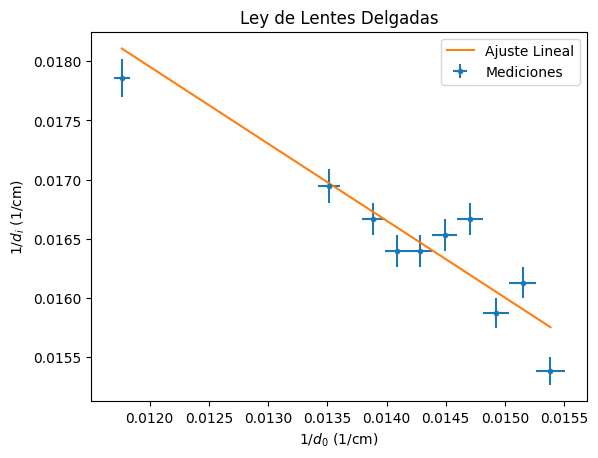

In [93]:
distancias_inv = np.linspace(d_o_[0], d_o_[-1], 100)

fig, ax = plt.subplots()
ax.set(xlabel='$1/d_0$ (1/cm)', ylabel='$1/d_i$ (1/cm)', title='Ley de Lentes Delgadas')

ax.errorbar(d_o_, d_i_, fmt='.',xerr=d_o_error,yerr=d_i_error,label='Mediciones')
ax.plot(distancias_inv, regresion.slope*distancias_inv + regresion.intercept, label='Ajuste Lineal')

ax.legend()

plt.savefig('LentesDelgadas.pdf', dpi=300)

In [92]:
print('Distancia focal por regresión lineal')
print('-s_0 = {:.4}+-{:.4}, f = {:.4}+-{:.4}'.format(
	1/regresion.slope, regresion.stderr/regresion.slope**2,
	1/regresion.intercept, regresion.intercept_stderr/regresion.intercept**2
))
print('-1/s_0 = {:.4}+-{:.4}, 1/f = {:.4}+-{:.4}'.format(
	regresion.slope, regresion.stderr, regresion.intercept, regresion.intercept_stderr
))
print('Error relativo de f:', (regresion.intercept_stderr/regresion.intercept**2)*regresion.intercept*100)

Distancia focal por regresión lineal
-s_0 = -1.536+-0.3753, f = 38.81+-3.476
-1/s_0 = -0.6511+-0.1591, 1/f = 0.02577+-0.002308
Error relativo de f: 8.956687934810478


In [90]:
print('Distancia focal por promedio')
print('f = {:.4}+-{:.4}'.format(
	1/np.average(d_o_ + d_i_), np.std(1/(d_o_ + d_i_))
))

Distancia focal por promedio
f = 32.57+-0.5034


In [97]:
regresion.rvalue

-0.8397479040157934